In [3]:
%reset -f

### (5 points) What’s the main difference between supervised and unsupervised learning?

The supervised learning is done using labeled data i.e. the training data carries the knowledge of 
what the output would be for a set of input data. In essence, the goal of supervised learning is 
to learn a function that, given a sample of data and desired outputs, best approximates the 
relationship between input and output observable in the data.

On contrary, unsupervised learning does not have labeled data, so its goal is to infer the pattern or
natural structure present within the dataset.



### (5 points) Will different initializations for k-means lead to different results?

k-means algorithm starts with random initialization of its centroids and number of centroids. while objective is to reduce the the WCSS ( within cluster sum of square) of all its points within preset iterations and/or thresholds , even though the solution may look like following a monotonically decreasing path, it may stuck at local minimum point. so based on the initialization of the centroids,
the solution can reach different local minimum every time but will not oscillate and will converge.

### (5 points) Give a short proof (can be in words but using correct logic) why k-means algorithm will converge in finite number of iterations.

The objective function of k-means is to reduce the distance between centroids and the prospective member of that cluster, so mathematically it would be a monotonously decreasing value and won't oscillate as we only assign new clusters when the new total distance is less than the previous one.  Also , the objective function is average sum of squared distance , whose minimum value can only be zero. 
So, even though the objective function may not give a global minimum but will provide a local minimum within finite iteration and will converge.

### (5 points) What is the main difference between k-means and generalized k-means algorithm? Explain how the choice of the similarity/dissimilarity/distance will impact the result.

In classic k-means algorithm, we start with number of clusters that we want our data points to belong too, which may not lead to an optimum clusters or solutions whereas in generalized k-means - it uses v-fold cross-validation scheme to find and assign optimal number of clusters. In generalized k-means distance function is not euclidian but any distance function among few choices - such as euclidian and minkwoski and within minkwoski we can have manhattan, infinite or p-th root distance.

Similarity and dissimilary functions essentially sets the baseline as what attributes would be compared to categorize leading to difference in comparisons and using different distance function that suits that attribute compare. This has huge impact - such as if infite distance is chosen, then one big outlier point can dominate the whole cluster assignment, whereas the lower the values used for p-th root,  will minimize individual points effect on overall distance.

### (10 points) Consider the following simple graph

Write down the graph Laplacian matrix and find the eigenvectors associated with the zero eigenvalue.
Explain how do you find out the number of disconnected clusters in graph and identify these
disconnected clusters using these eigenvectors.

In [4]:
import numpy as np
A=[[0,1,1,0,0],[1,0,1,0,0],[1,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]]
D = np.diag(np.sum(A, axis=1))
L = D-A

In [5]:
print("Laplacian matrix....")
L

Laplacian matrix....


array([[ 2, -1, -1,  0,  0],
       [-1,  2, -1,  0,  0],
       [-1, -1,  2,  0,  0],
       [ 0,  0,  0,  1, -1],
       [ 0,  0,  0, -1,  1]])

In [6]:
vals,vecs=np.linalg.eig(L)
print("Eigen vectors.....")
print(vecs)

Eigen vectors.....
[[ 0.81649658 -0.57735027  0.29329423  0.          0.        ]
 [-0.40824829 -0.57735027 -0.80655913  0.          0.        ]
 [-0.40824829 -0.57735027  0.5132649   0.          0.        ]
 [ 0.          0.          0.          0.70710678  0.70710678]
 [ 0.          0.          0.         -0.70710678  0.70710678]]


In [7]:
vals[vals == 0]
print("Number of zeros in eignvalue indicates number of disconnected graph...")
print(f"Number of disconnected graph : { len(vals[vals == 0])}")

Number of zeros in eignvalue indicates number of disconnected graph...
Number of disconnected graph : 1


In [8]:
vals

array([ 3.0000000e+00, -4.4408921e-16,  3.0000000e+00,  2.0000000e+00,
        0.0000000e+00])

### 2 Image compression using clustering [40 points]

#### Generic code

In [9]:
import numpy as np
from numpy.random import choice



def calculate_distance(X, centers, i_ord=2):
    return np.linalg.norm(X[:, np.newaxis, :] - centers, ord=i_ord, axis=2)
    

def assign_cluster_labels(S):
    return np.argmin(S, axis=1)   

def update_centers(X, y, order):
    # X[:m, :d] == m points, each of dimension d
    # y[:m] == cluster labels
    m, d = X.shape
    k = max(y) + 1
    
    centers = np.empty((k, d))
    for j in range(k):
        # Compute the new center of cluster j,
        # i.e., centers[j, :d].
        if order == 2:
            centers[j, :d] = np.mean(X[y == j, :], axis=0)
        else:
            centers[j, :d] = np.median(X[y == j, :], axis=0)
    #print(f"New Centers : {centers}")
    return centers

def has_converged(old_centers, centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])

def kmeans(X, k,
           starting_centers=None,
           max_steps=np.inf,
           order=2):
    if starting_centers is None:
        samples=choice(len(X),size=k, replace=False)
        #print(samples)
        centers=X[samples, :]
        #centers = initialize_centers(X, k)
    else:
        centers = starting_centers
    
    #print(centers)
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_centers = centers
        S = calculate_distance(X, centers,order)
        labels = assign_cluster_labels(S)
        centers = update_centers(X, labels, order)
        converged = has_converged(old_centers, centers)        
        #print ("iteration", i, "WCSS = ", WCSS (S))
        i += 1
    print(f"Total Iteration: {i}")
    return labels

#### (20 points) - part 1
Use k-means with squared-ℓ2 norm as a metric, for GeorgiaTech.bmp and football.bmp
and also choose a third picture of your own to work on. We recommend size of 320 × 240 or smaller.
Run your k-means implementation with these pictures, with several different k = 2, 4, 8, 16.

Run your k-means implementation (with squared-ℓ2 norm) with random initialization centroids. Please
try multiple time and report the best one (in terms of the image quality).

Please write in your report, how long does it take to converge for each k (report the number of
iterations, and elapsed time in seconds) and also include the resulted compressed pictures for each k
in the report.

GATech.bmp:  400 400 3
Football.bmp:  412 620 3
purple.bmp:  320 240 3
******
###############-----###############
Processing using L1 distance method
###############-----###############




Processing image START: gtech.bmp, cluster count: 2
Total Iteration: 8


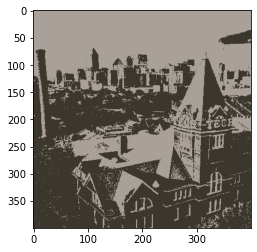

Processing image END: gtech.bmp, cluster count: 2, time taken:0.6136424541473389 seconds




Processing image START: gtech.bmp, cluster count: 4
Total Iteration: 28


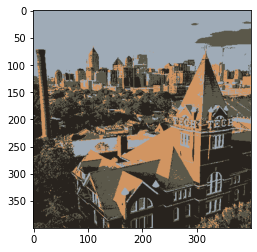

Processing image END: gtech.bmp, cluster count: 4, time taken:1.7461249828338623 seconds




Processing image START: gtech.bmp, cluster count: 8
Total Iteration: 34


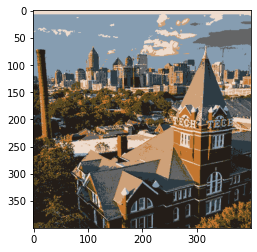

Processing image END: gtech.bmp, cluster count: 8, time taken:3.239227533340454 seconds




Processing image START: gtech.bmp, cluster count: 16
Total Iteration: 28


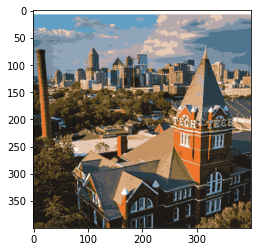

Processing image END: gtech.bmp, cluster count: 16, time taken:4.520238161087036 seconds
###############-----###############




Processing image START: football.bmp, cluster count: 2
Total Iteration: 5


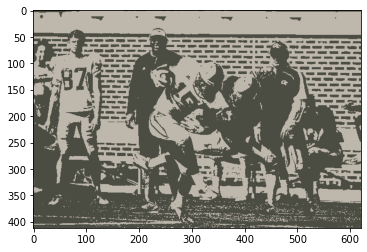

Processing image END: football.bmp, cluster count: 2, time taken:0.6439826488494873 seconds




Processing image START: football.bmp, cluster count: 4
Total Iteration: 11


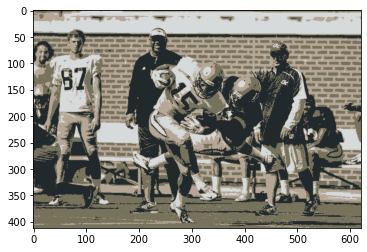

Processing image END: football.bmp, cluster count: 4, time taken:1.304034948348999 seconds




Processing image START: football.bmp, cluster count: 8
Total Iteration: 33


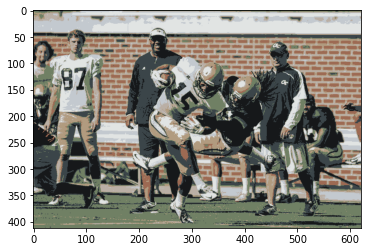

Processing image END: football.bmp, cluster count: 8, time taken:4.9689295291900635 seconds




Processing image START: football.bmp, cluster count: 16
Total Iteration: 38


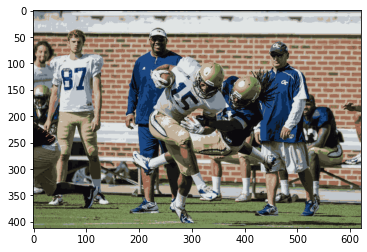

Processing image END: football.bmp, cluster count: 16, time taken:9.433518886566162 seconds
###############-----###############




Processing image START: koala.jpeg, cluster count: 2
Total Iteration: 9


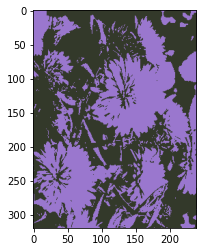

Processing image END: koala.jpeg, cluster count: 2, time taken:0.3872520923614502 seconds




Processing image START: koala.jpeg, cluster count: 4
Total Iteration: 10


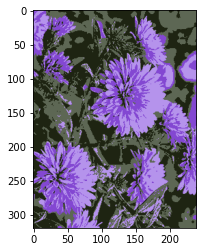

Processing image END: koala.jpeg, cluster count: 4, time taken:0.4821600914001465 seconds




Processing image START: koala.jpeg, cluster count: 8
Total Iteration: 33


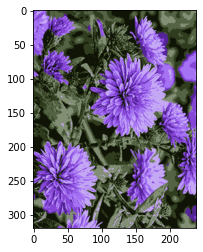

Processing image END: koala.jpeg, cluster count: 8, time taken:1.6133813858032227 seconds




Processing image START: koala.jpeg, cluster count: 16
Total Iteration: 38


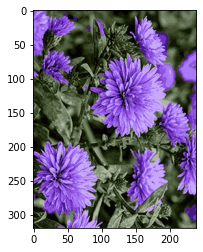

Processing image END: koala.jpeg, cluster count: 16, time taken:3.0118980407714844 seconds
###############-----###############
Processing using L2 distance method
###############-----###############




Processing image START: gtech.bmp, cluster count: 2
Total Iteration: 12


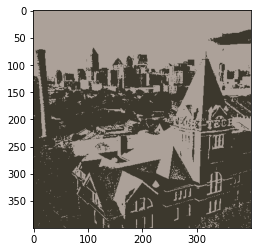

Processing image END: gtech.bmp, cluster count: 2, time taken:0.6946225166320801 seconds




Processing image START: gtech.bmp, cluster count: 4
Total Iteration: 44


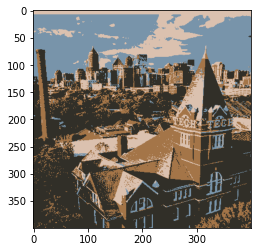

Processing image END: gtech.bmp, cluster count: 4, time taken:2.7462706565856934 seconds




Processing image START: gtech.bmp, cluster count: 8
Total Iteration: 107


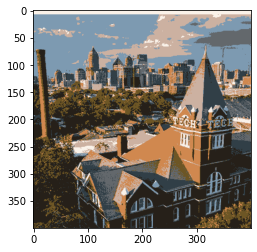

Processing image END: gtech.bmp, cluster count: 8, time taken:10.094353675842285 seconds




Processing image START: gtech.bmp, cluster count: 16
Total Iteration: 81


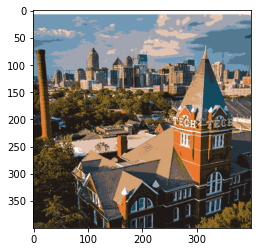

Processing image END: gtech.bmp, cluster count: 16, time taken:13.606616735458374 seconds
###############-----###############




Processing image START: football.bmp, cluster count: 2
Total Iteration: 25


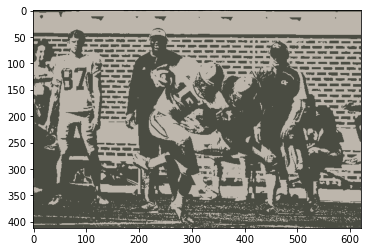

Processing image END: football.bmp, cluster count: 2, time taken:1.9103312492370605 seconds




Processing image START: football.bmp, cluster count: 4
Total Iteration: 30


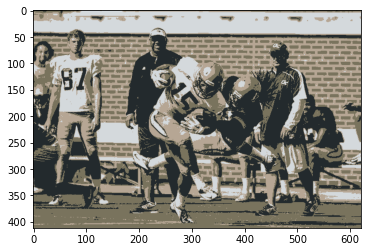

Processing image END: football.bmp, cluster count: 4, time taken:2.963833808898926 seconds




Processing image START: football.bmp, cluster count: 8
Total Iteration: 61


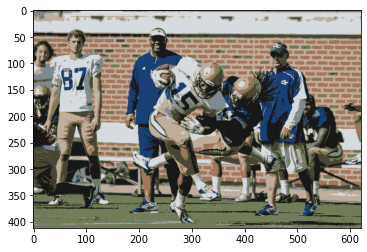

Processing image END: football.bmp, cluster count: 8, time taken:9.26459002494812 seconds




Processing image START: football.bmp, cluster count: 16
Total Iteration: 91


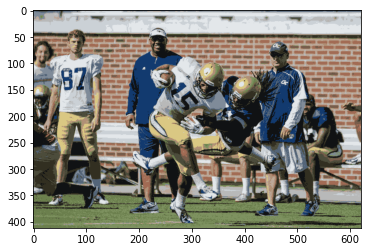

Processing image END: football.bmp, cluster count: 16, time taken:23.383222818374634 seconds
###############-----###############




Processing image START: koala.jpeg, cluster count: 2
Total Iteration: 20


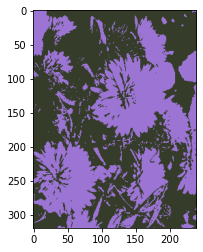

Processing image END: koala.jpeg, cluster count: 2, time taken:0.5670695304870605 seconds




Processing image START: koala.jpeg, cluster count: 4
Total Iteration: 39


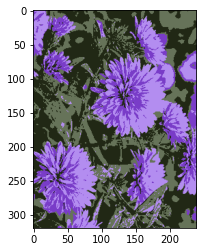

Processing image END: koala.jpeg, cluster count: 4, time taken:1.254899501800537 seconds




Processing image START: koala.jpeg, cluster count: 8
Total Iteration: 55


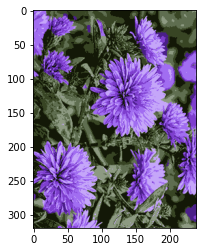

Processing image END: koala.jpeg, cluster count: 8, time taken:2.670865058898926 seconds




Processing image START: koala.jpeg, cluster count: 16
Total Iteration: 125


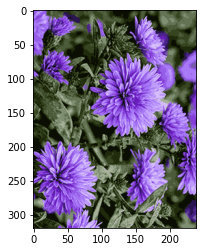

Processing image END: koala.jpeg, cluster count: 16, time taken:10.056041717529297 seconds


In [10]:
from matplotlib import image, pyplot as plt
import time
from PIL import Image

pic_dict=[]

#plt_gtech=image.imread(r"C:\Users\mouso\Spring2022\ISYE6414\homework1-eb401e11-6b4e-48c9-b101-5fc9d6071480\data\GeorgiaTech.bmp")
plt_gtech=image.imread("GeorgiaTech.bmp")
gtech_arr=np.array(plt_gtech)
r,c,l =gtech_arr.shape
print("GATech.bmp: ",r,c,l)
gtech_arr_reshape= np.reshape(gtech_arr,(r*c,l))
pic_dict.append({'gtech.bmp':[gtech_arr_reshape,(r,c,l)]})

#plt_football=image.imread(r"C:\Users\mouso\Spring2022\ISYE6414\homework1-eb401e11-6b4e-48c9-b101-5fc9d6071480\data\football.bmp")
plt_football=image.imread(r"football.bmp")
football_arr=np.array(plt_football)
r,c,l =football_arr.shape
print("Football.bmp: ",r,c,l)
football_arr_reshape= np.reshape(football_arr,(r*c,l))
pic_dict.append({'football.bmp':[football_arr_reshape,(r,c,l)]})

#plt_koala=image.imread(r"C:\Users\mouso\Spring2022\ISYE6414\homework1-eb401e11-6b4e-48c9-b101-5fc9d6071480\data\purple.bmp")
plt_koala=image.imread(r"purple.bmp")
koala_arr=np.array(plt_koala)
r,c,l =koala_arr.shape
print("purple.bmp: ",r,c,l)
koala_arr_reshape= np.reshape(koala_arr,(r*c,l))
pic_dict.append({'koala.jpeg':[koala_arr_reshape,(r,c,l)]})


print("******")


#print(football_arr_reshape.shape)
#print(football_arr_reshape)

cluster_no_list=[2,4,8,16]

for dist_order in [1,2]:
    print("#" * 15 + '-'*5 +'#'*15)
    print(f"Processing using {'L2' if dist_order ==2 else 'L1'} distance method")
    
    for i,pic in enumerate(pic_dict):
        print("#" * 15 + '-'*5 +'#'*15)
        for image,val in pic.items():        
            #fig,ax=plt.subplots(2,2)
            #print(fig)
            #ax[i].imshow(val[0])
            for num_cluster in cluster_no_list:
                stime= time.time()
                plt.imshow(val[0])
                #plt.show()
                print("\n\n\n")
                print(f"Processing image START: {image}, cluster count: {num_cluster}")
                labels=kmeans(X=val[0],k=num_cluster,order=dist_order)
                #type(labels)
                ind=np.column_stack((val[0], labels))
                #print(ind)

                centers={}
                #print(set(labels))

                for i in set(labels):
                    c = ind[ind[:,3] == i].mean(axis=0)
                    centers[i] = c[:3]
                #print(centers)
                #print(f"Final centers {centers}")
                img_clustered = np.array([centers[i] for i in labels]) 

                img_disp=np.reshape(img_clustered,val[1],order="C")
                #print(img_disp.shape)
                arr=img_disp.astype(dtype='uint8')
                img=Image.fromarray(arr,'RGB')
                plt.imshow(img)
                plt.show()
                etime= time.time()
                print(f"Processing image END: {image}, cluster count: {num_cluster}, time taken:{etime-stime} seconds")
                plt.show()
            plt.show()





#### (20 points) Part 2
Now try your k-means with the Manhattan distance (or ℓ1 distance) and repeat the same
steps in Part (1). Please note that the assignment of data point should be based on the Manhattan
distance, and the cluster centroid (by minimizing the sum of deviance – as a result of using the
Manhattan distance) will be taken as the “median” of each cluster. Comment on the difference of
image compression results using the two methods.

#### Ans: 
Please see above code and output , which has been generalized to run for noth L1 and L2 distance calculation method.
One observation is that with eucledian distance ( L2 ) every run takes more iterations to reach to local minimum and takes a bit longer time. And also noticably L2 has better picture quality.

#### Start of spectral Clustering

The shape of df2:(1224, 1224)
**************************************************
Processing for no. of clusters:2


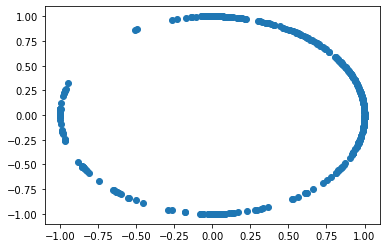

Cluster mismatch :0.4803921568627451
Mismatch rate within cluster for each group... 
   kmeans_label     count
0             0  0.472275
1             1  0.486448
**************************************************
Processing for no. of clusters:5


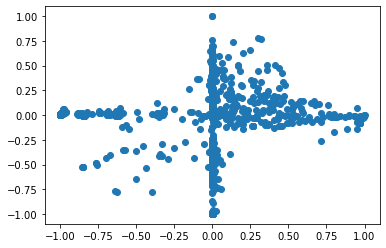

Cluster mismatch :0.07516339869281045
Mismatch rate within cluster for each group... 
   kmeans_label     count
0             0  0.089474
1             1  0.075000
2             2  0.098361
3             3  0.011952
4             4  0.120000
**************************************************
Processing for no. of clusters:10


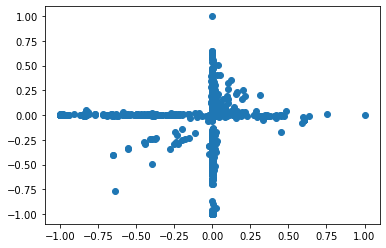

Cluster mismatch :0.08251633986928104
Mismatch rate within cluster for each group... 
   kmeans_label     count
0             0  0.159091
1             1  0.030928
2             2  0.113636
3             3  0.057325
4             4  0.100775
5             5  0.153226
6             6  0.053476
7             7  0.016129
8             8  0.065217
9             9  0.019231
**************************************************
Processing for no. of clusters:20


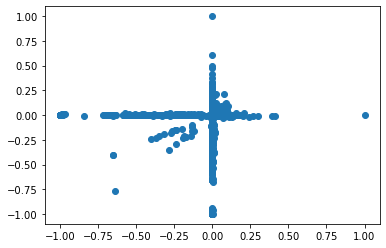

Cluster mismatch :0.08660130718954248
Mismatch rate within cluster for each group... 
    kmeans_label     count
0              0  0.049383
1              1  0.018692
2              2  0.030769
3              3  0.027027
4              4  0.055556
5              5  0.065217
6              6  0.028169
7              7  0.014085
8              8  0.018868
9              9  0.020408
10            10  0.092308
11            11  0.156250
12            12  0.074074
13            13  0.157895
14            14  0.093750
15            15  0.111111
16            16  0.061224
17            17  0.321429
18            18  0.161290
19            19  0.389831


In [11]:
%reset -f
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
import scipy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd

def import_graph(fname):
    # read the graph file
    f_path = abspath(fname)
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)


def read_nodes():
    #a=r'C:\Users\mouso\Spring2022\ISYE6414\homework1-eb401e11-6b4e-48c9-b101-5fc9d6071480\data\nodes.txt'
    a=r'nodes.txt'
    f_path = abspath(a)
    if exists(f_path):
        with open(f_path) as graph_file:
            df=pd.read_csv(graph_file,sep="\t", header=None)
            df.columns=["id","site","label", "group"]
    return df
            #lines = [line.split() for line in graph_file]
    #return [{line[0]:[line[1],line[2],line[3]]} for line in lines]

    
    


#Load the graph
#a=import_graph(r'C:\Users\mouso\Spring2022\ISYE6414\homework1-eb401e11-6b4e-48c9-b101-5fc9d6071480\data\edges.txt')
a=import_graph(r'edges.txt')
nodes = read_nodes()
nodes_with_connection = np.unique(np.concatenate((a[:,0],a[:,1]),axis=0))

#Build adjacency metrics


n = a.shape[0]  # no. of teams

i = a[:, 0]-1
j = a[:, 1]-1
v = np.ones((a.shape[0], 1)).flatten()
A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
A = (A + np.transpose(A))/2
nodes_df=pd.DataFrame(A.toarray())

#remove all rows that are zero
df1=nodes_df.loc[(nodes_df !=0).any(axis=0),:]

#remove all cols that are zero
df2 = df1.loc[:, (df1 != 0).any(axis=0)]

print(f'The shape of df2:{df2.shape}')

D=np.diag(df2.sum(axis=0))

L = D-df2
# # spectral clustering
# k = 4
# A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
# A = (A + np.transpose(A))/2

# A=A.tocsr()
# A=A[A.getnnz(axis=1)>0][:,A.getnnz(axis=0)>0] #square matrix

# A = sparse.csc_matrix.todense(A) # ## convert to dense matrix

# D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
# L = D @ A @ D # Matrix product
# L = np.array(L) # ## covert to array

# v, x = np.linalg.eig(L)
# x = x[:, 0:k].real

# eigendecompoosition
vals, vecs= np.linalg.eig(L)
idx_sorted = np.argsort(vals)[::-1] # the index of eigenvalue sorted acsending

cluster_nums=[2,5,10,20]
#cluster_nums=[5]
wcss=[]
for k in cluster_nums:
    print(f"{50*'*'}")
    print(f"Processing for no. of clusters:{k}")
    
    #largest eigenvectors
    v= vecs[:,idx_sorted[0:k]].real
    v=v/np.repeat(np.sqrt(np.sum(v*v,axis=1).reshape(-1,1)),k,axis=1)
    
    # scatter
    plt.scatter(v[:, 0], v[:, 1])
    plt.show()
    
    # k-means
    kmeans = KMeans(n_clusters=k,init = 'k-means++', random_state=42).fit(v.real)  # use the 
    c_idx = kmeans.labels_
    wcss.append(kmeans.inertia_)

    # Build a dataframe with kmeans_label and raw label
    res = pd.DataFrame((nodes.loc[df2.index])['label'])
    res["kmeans_label"]=list(c_idx)
    counts=pd.DataFrame(res.groupby(by=['kmeans_label','label']).size())
    #counts.reset_index(inplace=True)
    counts.rename(columns={0:'count'},inplace=True)
    m=counts
    #m=counts.sort_values(['kmeans_label','label','count'],ascending=False)

    
    # cluster level mismatch
    cluster_mismatch=sum(m.groupby(['kmeans_label']).sum('count')['count']-m.groupby(['kmeans_label']).max('count')['count'])/m['count'].sum()

    print(f'Cluster mismatch :{cluster_mismatch}')

    
    
    
    print("Mismatch rate within cluster for each group... ")
    result_in_cluster=pd.DataFrame((m.groupby(['kmeans_label']).sum('count')['count']-m.groupby(['kmeans_label']).max('count')['count'])/m.groupby(['kmeans_label']).sum('count')['count'])
    result_in_cluster.rename(columns={'count':'mismatch_rate'})
    result_in_cluster.reset_index(inplace=True)
    print(result_in_cluster)
    
#     for i in range(k):
#         #mismatch_rate=m.loc[0,'count']/(1 if m.loc[1,'count'] ==0 else m.loc[1,'count'])
#         mismatch_rate=((m.groupby(['kmeans_label'])['count'].sum())[0]-m.loc[0,'count'])/(m.groupby(['kmeans_label'])['count'].sum())[0]

#         print(f"\t\t mismatch rate for {i} is {mismatch_rate}")
        

#### Part - 2
(15 points) Tune your k and nd the number of clusters to achieve a reasonably small mismatch rate.
Please explain how you tune k and what is the achieved mismatch rate. Please explain intuitively what
this results tells about the network community structure.

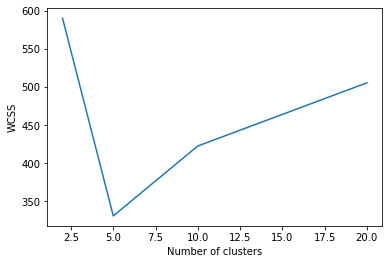

In [12]:
#Elbow plot
from matplotlib import pyplot as plt
plt.plot(cluster_nums, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

To find the optimal clustering, elbow plot can be used. This shows how with cluster size , overall within cluster sum of squared distance changes. For our case , clearly with cluster number 5 the WCSS is teh least and then increases with higher number of clusters ( generally flattens or no benefit marginally).

Intuitively, to teh extreme if we think every point has is its own cluster center, then sum of that would be zero BUT that is not optimal and won't be useful. On other hand, with least number say 1 cluster the distance would be highest. With increasing number of cluster, the WCSS falls sharply and after the optimal point there is not much significant change.